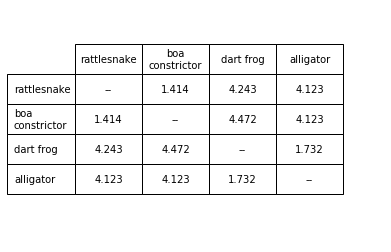

In [1]:
#******* PRODUCING DISTANCE MATRIX **********

import pylab

# Minkowski Metric
def minkowskiDist(X1, X2, p):
    """Assumes X1 and X2 are equal-length arrays of numbers
       Returns Minkowski distance of order p between X1 and X2"""
    dist = 0.0
    for i in range(len(X1)):
        dist += abs(X1[i] - X2[i])**p
    return dist**(1/p)

# Animal Class (defines the distance between two animals as Euclidean)

class Animal(object):
    def __init__(self, name, features):
        """Assumes name a string; features a list of numbers"""
        self.name = name
        self.features = pylab.array(features)
        
    def getName(self):
        return self.name
    
    def getFeatures(self):
        return self.features
    
    def distance(self, other):
        """Assumes other an Animal
           Returns the Euclidean distance between fearure vectors
           of self and other"""
        return minkowskiDist(self.getFeatures(), other.getFeatures(), 2)
    

# Producing the Distance Matrix to Compare Animals

def compareAnimals(animals, precision):
    """Assumes animals is a list of animals, precision an int >= 0
       Builds a table of Euclidean distance between each animal"""
    
# Getting labels for columns and row
    columnLabels = []
    for a in animals:
        columnLabels.append(a.getName())
    rowLabels = columnLabels[:]
    tableVals = []
    # Getting distance between pairs of animals:
    # For each Row
    for a1 in animals:
        row = []
    # For each Coloum
        for a2 in animals:
            if a1 == a2:
                row.append('--')
            else:
                distance = a1.distance(a2)
                row.append(str(round(distance, precision)))
        tableVals.append(row)
        
# Producing Table
    table = pylab.table(rowLabels = rowLabels,
                       colLabels = columnLabels,
                       cellText = tableVals,
                       cellLoc = 'center',
                       loc = 'center',
                       colWidths = [0.2]*len(animals))
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2.5)
    pylab.axis('off')
    pylab.savefig('distances')
    pylab.show()
    
    
# Initializing and Calling
rattlesnake = Animal('rattlesnake', [1, 1, 1, 1, 0])
boa = Animal('boa\nconstrictor', [0, 1, 0, 1, 0])
dartFrog = Animal('dart frog', [1, 0, 1, 0, 4])
animals = [rattlesnake, boa, dartFrog]
alligator = Animal('alligator', [1, 1, 0, 1, 4])
animals.append(alligator)
compareAnimals(animals, 3)
